<a href="https://colab.research.google.com/github/inacio-puntel/mentor_projetos_pesquisa/blob/main/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install gdown
!pip install plotnine
import pandas as pd
import gdown
from plotnine import *

In [3]:


# Get the Google Drive file ID
file_id = '1YXesbDQ2hHJsGMpwUyj4fL9TPjxm85PP'

# Download the file
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dados.csv'  # Name of the downloaded file
gdown.download(url, output, quiet=False)

# Read the downloaded CSV file
dados = pd.read_csv('dados.csv', sep=",")
dados.info()

Downloading...
From (original): https://drive.google.com/uc?id=1YXesbDQ2hHJsGMpwUyj4fL9TPjxm85PP
From (redirected): https://drive.google.com/uc?id=1YXesbDQ2hHJsGMpwUyj4fL9TPjxm85PP&confirm=t&uuid=e1c52db3-2553-4536-961d-393c3d36c154
To: /content/dados.csv
100%|██████████| 677M/677M [00:10<00:00, 66.2MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10645276 entries, 0 to 10645275
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idprpd          int64  
 1   n               int64  
 2   fase            float64
 3   amplitude       float64
 4   dataset_number  int64  
 5   date            object 
 6   classe_dp       object 
dtypes: float64(2), int64(3), object(2)
memory usage: 568.5+ MB


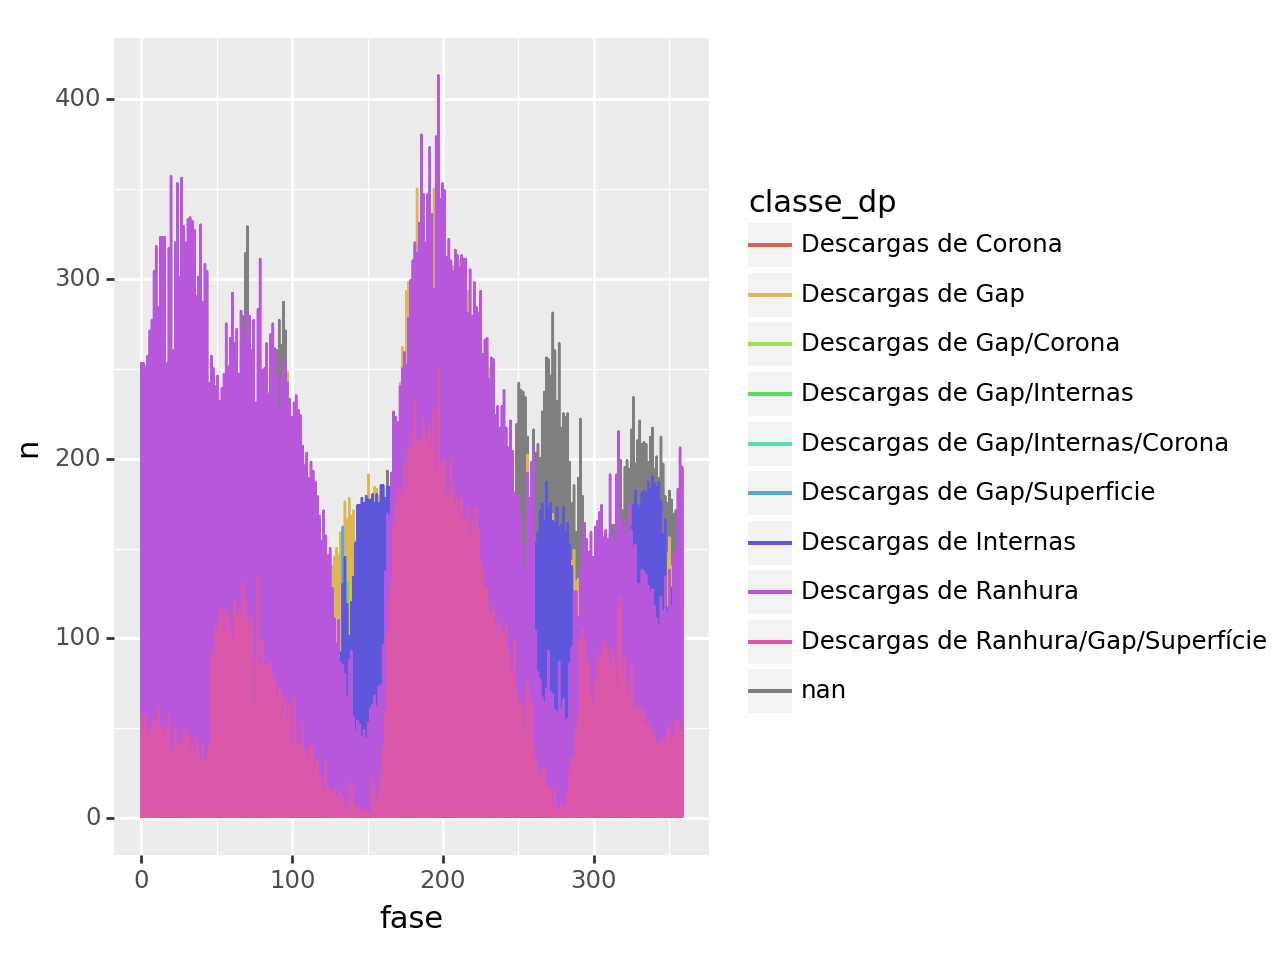

<Figure Size: (640 x 480)>

In [ ]:
ggplot(dados) + \
  geom_line(aes(x='fase', y='n', color='classe_dp'))


In [ ]:
dados[dados['date_datetime'].notnull()]

,idprpd,n,fase,amplitude,dataset_number,date,classe_dp,date_datetime
0,0,0,0.0000,-10.99900,0,2024-01-01,Descargas de Gap,2024-01-01
1,2,1,29.5312,-2.12641,0,2017-03-31,Descargas de Gap,2017-03-31
2,3,1,30.9375,-2.12641,0,2017-03-31,Descargas de Gap,2017-03-31
3,6,1,20.1110,-10.99900,0,2024-01-01,Descargas de Gap,2024-01-01
4,5,1,29.5312,-2.07497,0,2017-03-31,Descargas de Gap,2017-03-31
...,...,...,...,...,...,...,...,...
10645271,10645274,1,195.4690,0.06720,4603,2021-12-31,Descargas de Internas,2021-12-31
10645272,10645275,1,233.4380,0.06720,4603,2021-12-31,Descargas de Internas,2021-12-31
10645273,10645276,1,250.3120,0.06873,4603,2021-12-31,Descargas de Internas,2021-12-31
10645274,20,10,11.1100,-10.99900,30,2024-01-01,Descargas de Corona,2024-01-01


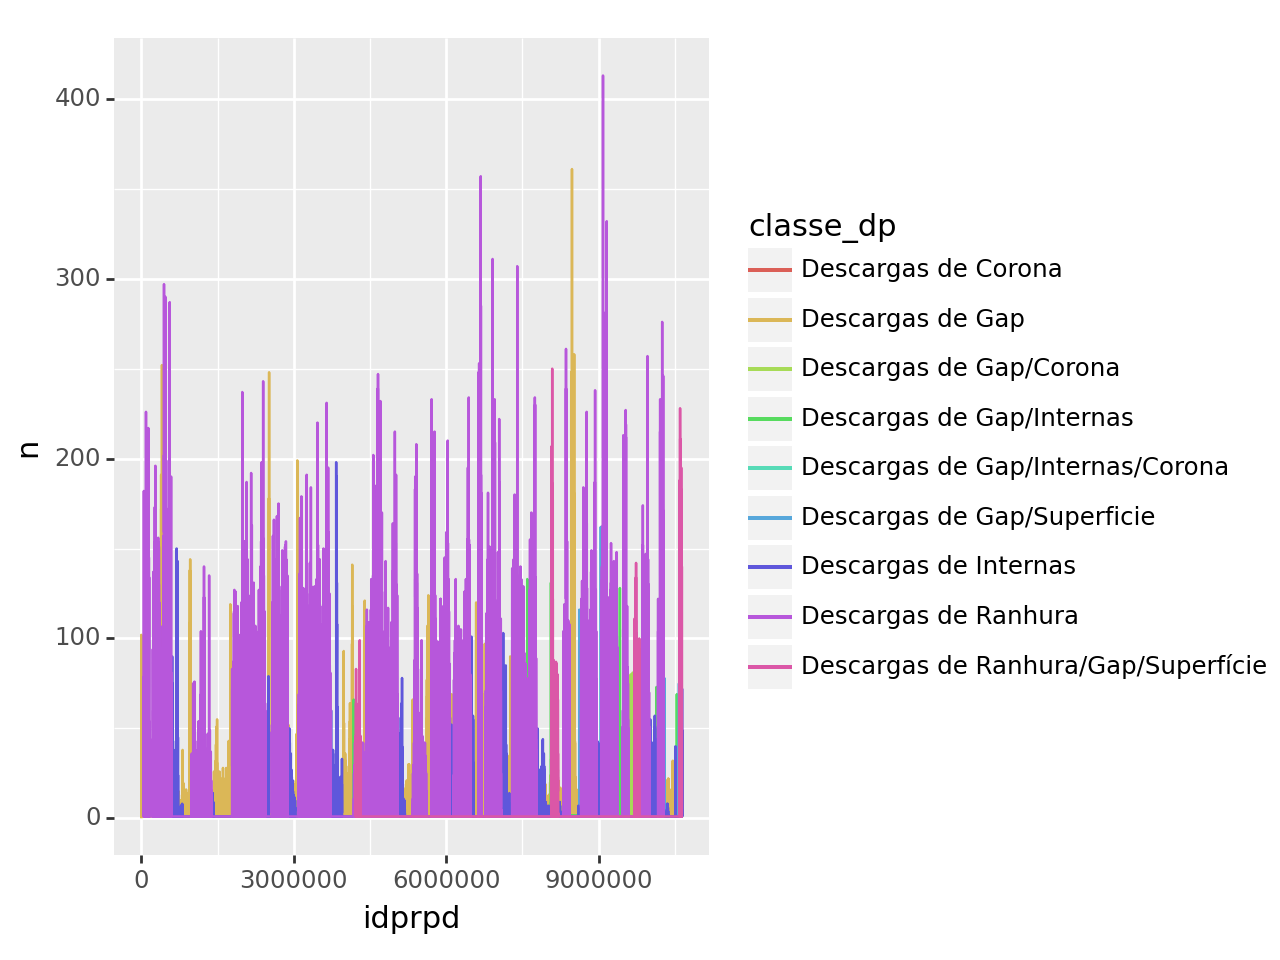

<Figure Size: (640 x 480)>

In [ ]:
ggplot(dados[dados['classe_dp'].notnull()]) + \
  geom_line(aes(x='idprpd', y='n', color='classe_dp'))

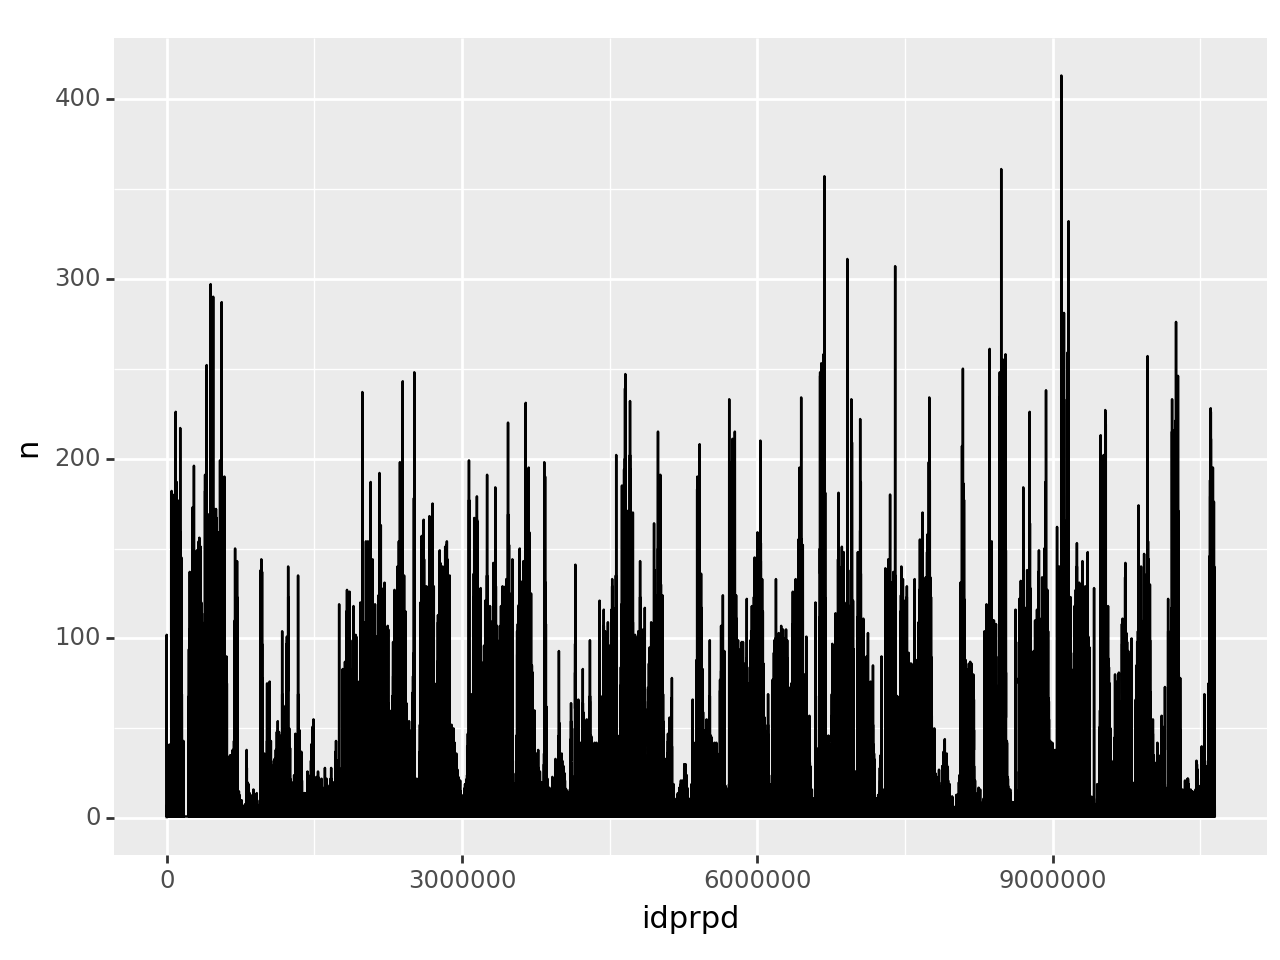

<Figure Size: (640 x 480)>

In [ ]:
ggplot(dados[dados['classe_dp'].notnull()]) + \
  geom_line(aes(x='idprpd', y='n'))

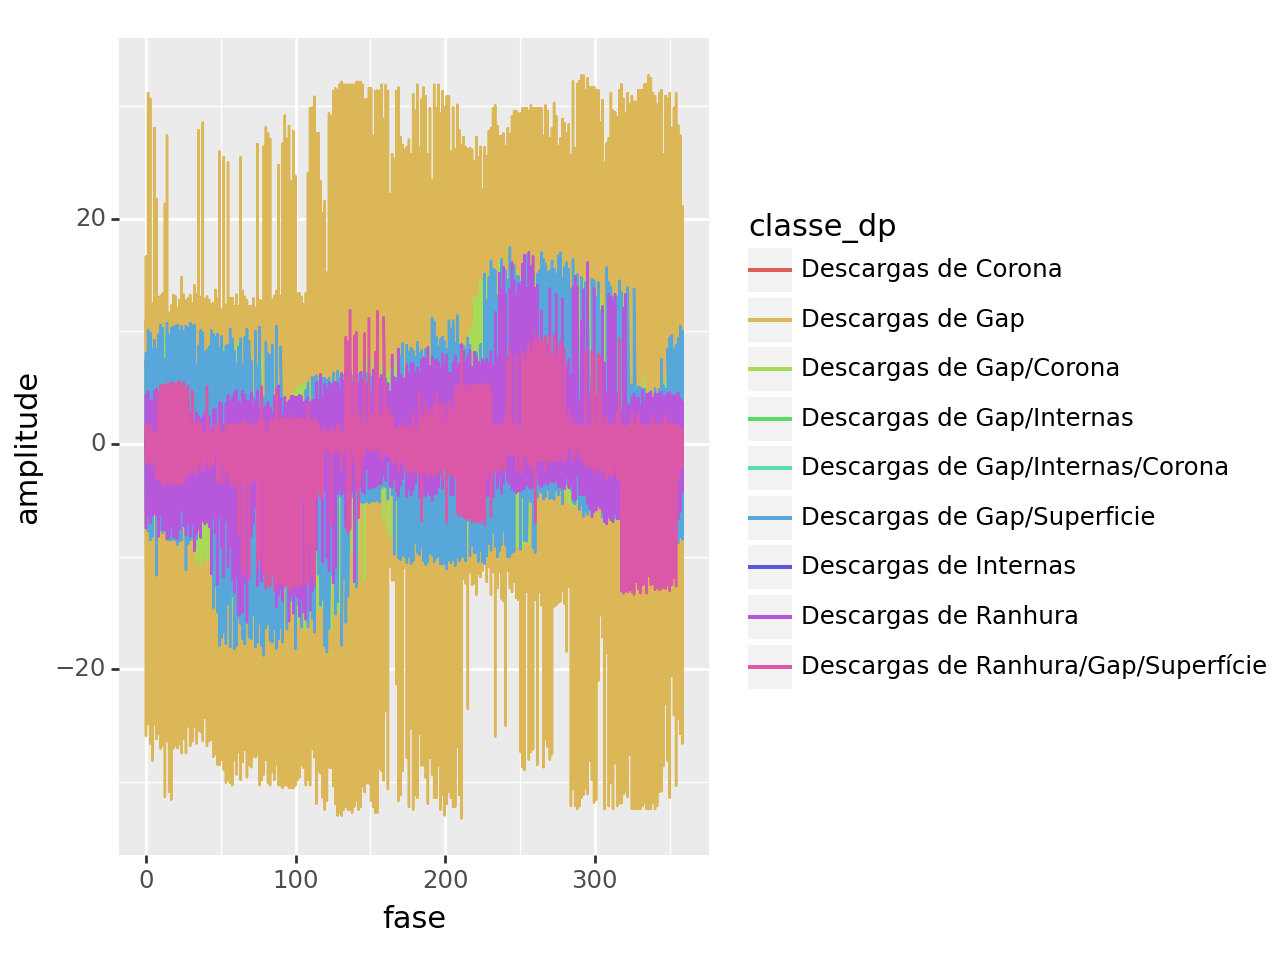

<Figure Size: (640 x 480)>

In [17]:
ggplot(dados[dados['classe_dp'].notnull()]) + \
  geom_line(aes(x='fase', y='amplitude', color='classe_dp'))

In [ ]:
ggplot(dados[dados['classe_dp'].notnull()]) + \
  geom_point(aes(x='idprpd', y='fase', color='classe_dp'))

In [ ]:
dados['classe_dp'].astype('category').value_counts()

,count
classe_dp,
Descargas de Ranhura,5674633
Descargas de Gap,2579942
Descargas de Internas,1505331
Descargas de Ranhura/Gap/Superfície,373086
Descargas de Gap/Internas,144508
Descargas de Gap/Corona,144062
Descargas de Gap/Superficie,87688
Descargas de Gap/Internas/Corona,35935
Descargas de Corona,96


In [10]:
dados_comp = dados[dados['classe_dp'].notna()]
dados_teste = dados_comp.drop(['idprpd','date', 'dataset_number'], axis = 1)

dados_teste.info()

x = dados_teste.drop(['classe_dp'], axis = 1)
y = dados_teste['classe_dp']

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state=2508)

<class 'pandas.core.frame.DataFrame'>
Index: 10545281 entries, 0 to 10645275
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   fase       float64
 1   amplitude  float64
 2   classe_dp  object 
dtypes: float64(2), object(1)
memory usage: 321.8+ MB


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=10)

In [12]:
classe_pred = knn_model.predict(x_teste)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_teste, classe_pred)
print(accuracy)

0.6206983532922302
